# Prediction on Animal Species

## Summary:
The dataset we will be using is Zoo (1990) provided by UC Irvine Machine Learning Repository. It stores data about 7 class animals and related attributes inlcuding animal name, hair, feathers etc are contained. In this project, we will use classification to classify a given animal to the most likely class.
## Introduction:
The earth is an amazing planet that cultivates branches of animals. In general, sholars split them into 12 classes including mammals, birds, reptiles, amphibians, fishes, insects, crustaseans, arachnids, echiniderms, worms, mollusks and sponges(BioExploer.net., 2022). The traditional way in animal classification is mannualy identifying the characteristics and attributing it the mostly close class (Manohar, Sharath, & Kumar, 2016). However, it is tedious and time consuming, especially when the dataset is very huge. A question hereby comes to us, if we can apply K-nearest neighbours (KNN) algorithms in predicting the type an animal belongs to given its related characteristics, such as hair, feathers, etc.? Therefore, in this project, we will show how we use KNN to do classification in animals based on dataset Zoo(1990) whhich contains 1 categorical attribute, 17 Boolean-valued attributes and 1 numerical attribute. The categorical attribute appears to be the class attribute. Detailed breakdowns are as follows:
1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])

## Methods & Results
We are going to use a K nearest neighbors analysis to classify the type of the animals using 16 variables including hair, feathers, eggs, milk, airborne, aquatic, predator, toothed, backbone, breathes, venomous, fins, legs, domestic, catsize as our predictors. To predict the class of a new observation the K-nn classifier generally finds the k numbers of observations that are the nearest to the new observation in the training set.(Tiffany Timbers, Trevor Campbell, and etc., 2022) According to how those observations located on plot, we want to first take a glance of the class of the new observation. Further by using the information of predictors of the K-nn animals, we can reasonably predict the type.

In [ ]:
import pandas as pd
import csv
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import jaccard_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
#reading the data as a csv from the uci web server, with header = false as the data contains no header
zoo_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", header = None)
#Adding column names to the data
colm = [ "animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", 
        "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type" ]
#Adding the columns to our zoo_data dataframe
zoo_data.columns = colm

In [ ]:
zoo_data = pd.read_csv("./data/zoo.csv")
zoo_data.head()

,Unnamed: 0,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


The first thing is to import the data. The dataset is downloaded from [UCI repository]("https://archive-beta.ics.uci.edu/ml/datasets/zoo"). It is then saved as a csv file in this project repository. Some exploratory data analysis needs to be run before running the actual analyses on the dataset.

In [ ]:
#saving the data as a csv file in our data directory
# zoo_data.to_csv(r'./data/zoo.csv')

In [ ]:
# Check if there are missing values
print("Whether the dataset contains missing value: " + str(zoo_data.isna().any().any()))

Whether the dataset contains missing value: False


In [ ]:
# drop the first column
zoo_data = zoo_data.drop(zoo_data.columns[[0,1]], axis=1)

In [ ]:
# Create a summary of the data set, including descriptive statistics
zoo_data.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


After checking whether there is missing value in the dataset, and generating a summary of the dataset, it is clear that the data is clean. Since most features are binary and categorical, there is no need to do normalization and standardization.

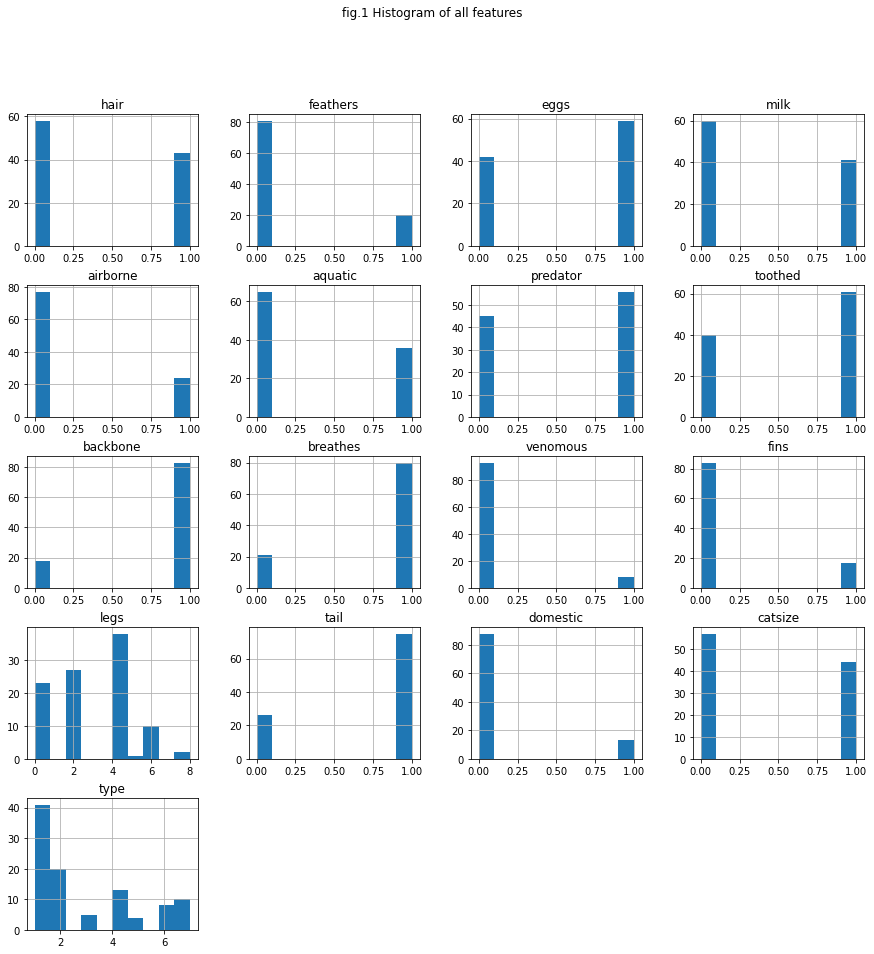

In [ ]:
# Create a visualization of the dataset
zoo_data.hist(figsize=(15,15));
plt.suptitle("fig.1 Histogram of all features");

As shown in fig.1, the histograms of each feature are generated. The ones with skewed distribution might be more decisive in the prediction. However, since the dataset is relatively small, all the features except the `animalName` are going to be used to predict. In the next part, we are going to split the data, into the training set and testing set. Then, different classification models will be trained and evaluation.

### Classification
Now we will use the training set to build an accurate model. Then use the test set to report the accuracy of the models, we will use the following algorithm:

K Nearest Neighbor(KNN)
<br>
Decision Tree
<br>
Support Vector Machine
<br>
Logistic Regression

In [ ]:
#extracting the feature that will predict
feature = zoo_data[[ "hair", "feathers", "eggs", "milk", "airborne", 
                   "aquatic", "predator", "toothed", "backbone", "breathes", 
                   "venomous", "fins", "legs", "tail", "domestic", "catsize"]]
#making it as a X
X = feature
X.head()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1


In [ ]:
#taking the y values, the type
y = zoo_data['type']
y[0:5]

0    1
1    1
2    4
3    1
4    1
Name: type, dtype: int64

In [ ]:
#splitting the dataset 80-20 for train and test
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Training set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Training set: (80, 16) (80,)
Test set: (21, 16) (21,)


#### KNN
Explain KNN in 2 lines

In [ ]:
#training the model for different set of K values and finding the best K value
Ks = 81
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([1.        , 0.95238095, 0.95238095, 0.9047619 , 0.85714286,
       0.80952381, 0.85714286, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.76190476, 0.76190476, 0.76190476,
       0.76190476, 0.76190476, 0.71428571, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.61904762, 0.61904762,
       0.61904762, 0.61904762, 0.61904762, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.57142857, 0.57142857, 0.57142857, 0.57142857, 0.57142857,
       0.47619048, 0.42857143, 0.42857143, 0.42857143, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333333,
       0.33333333, 0.33333333, 0.33333333, 0.33333333, 0.33333

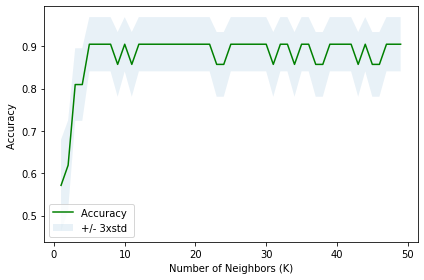

In [69]:
#plotting the aaccuracy for different K values
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with the values", mean_acc.max(), "with k=", mean_acc.argmax()+1 )

The best accuracy was with the values 1.0 with k= 1


In [ ]:
# Finding the K value using Grid Search
knn = KNeighborsClassifier()
k_vals = list(range(1, 21))
param_grid = dict(n_neighbors=k_vals)
grid = GridSearchCV(knn, param_grid, cv=3, scoring='accuracy')
grid.fit(X_train, y_train)
grid.best_params_

{'n_neighbors': 1}

In [ ]:
#as the best accuracy was with K = 1
#using K = 1 for the final KNN model
#Final KNN model is here used the splited test part to train again for better training, and better prediction
final_knn_model = KNeighborsClassifier(n_neighbors = 1).fit(X,y)

#### KNN Evaluation

In [ ]:
yhat = final_knn_model.predict(X_test)
accuracyScore = metrics.accuracy_score(y_test, yhat)
print("So the accuracy score for K = 1 is: " + str(accuracyScore))

So the accuracy score for K = 1 is: 1.0


In [ ]:
# cross-validation on knn
cv_results_knn = cross_validate(final_knn_model, X_train, y_train, cv=3, return_train_score=True);
pd.DataFrame(cv_results_knn).mean()

fit_time       0.002074
score_time     0.003392
test_score     0.936847
train_score    1.000000
dtype: float64

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      1.00      1.00         4

    accuracy                           1.00        21
   macro avg       1.00      1.00      1.00        21
weighted avg       1.00      1.00      1.00        21



### Decision Tree
Explain decission tree in 2 lines

In [ ]:
Ks = 50
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    decTree = DecisionTreeClassifier(criterion="entropy", max_depth = n)
    decTree.fit(X_train,y_train)
    yhat=decTree.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.57142857, 0.61904762, 0.80952381, 0.80952381, 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.85714286, 0.9047619 ,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.85714286, 0.9047619 ,
       0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 , 0.9047619 ,
       0.85714286, 0.9047619 , 0.9047619 , 0.85714286, 0.9047619 ,
       0.9047619 , 0.85714286, 0.85714286, 0.9047619 , 0.9047619 ,
       0.9047619 , 0.9047619 , 0.85714286, 0.9047619 , 0.85714286,
       0.85714286, 0.9047619 , 0.9047619 , 0.9047619 ])

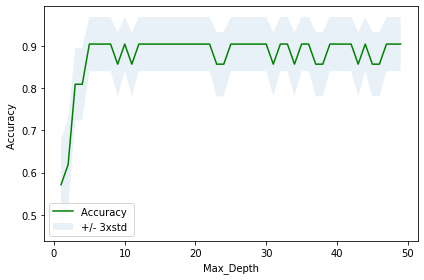

In [70]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Max_Depth')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with the values", mean_acc.max(), "with max_depth =", mean_acc.argmax()+1) 

The best accuracy was with the values 0.9047619047619048 with max_depth = 5


In [ ]:
#As Best is max depth = 5
#using max depth = 5 for the final decision tree
#Final decisison tree is here used the splited test part to train again for better training, and better prediction
Final_dec_Tree = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
Final_dec_Tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

#### Decision Tree Evaluation

In [ ]:
yhat=Final_dec_Tree.predict(X_test)
accuracyScore = metrics.accuracy_score(y_test, yhat)
print("So the accuracy score for max depth = 5 is: " + str(accuracyScore))

So the accuracy score for max depth = 5 is: 0.9523809523809523


In [ ]:
# cross-validation on decision tree
cv_results_dt = cross_validate(Final_dec_Tree, X_train, y_train, cv=4, return_train_score=True);
pd.DataFrame(cv_results_dt).mean()

/Users/sunweihao/opt/miniconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=4.
  warnings.warn(


fit_time       0.003311
score_time     0.002075
test_score     0.937500
train_score    0.995833
dtype: float64

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.75      0.86         4

    accuracy                           0.95        21
   macro avg       0.96      0.96      0.95        21
weighted avg       0.96      0.95      0.95        21



### Support Vector Machine
Explain SVM in 2 lines

In [ ]:
svec = svm.SVC(kernel='poly')
svec.fit(X_train, y_train)

SVC(kernel='poly')

In [ ]:
yhat = svec.predict(X_test)
acc = jaccard_score(y_test, yhat, average='micro')
print("So the Jaccard score for SVM is: " + str(acc))

So the Jaccard score for SVM is: 0.8260869565217391


In [ ]:
#Final SVM is here used the splited test part to train again for better training, and better prediction
svec = svm.SVC(kernel='poly')
finalSVM = svec.fit(X, y) 

#### SVM Evaluation

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         5
           4       0.33      1.00      0.50         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       1.00      0.50      0.67         4

    accuracy                           0.90        21
   macro avg       0.89      0.92      0.86        21
weighted avg       0.97      0.90      0.91        21



# Logistic Regression
Exlplain LR in 2 lines

In [ ]:
LR = LogisticRegression(C=0.07, solver='sag').fit(X_train, y_train)
yhat = LR.predict(X_test)
acc = jaccard_score(y_test, yhat, average='micro')
print("So the Jaccard score for Logistic Regression is: " + str(acc))

So the Jaccard score for Logistic Regression is: 0.68


In [ ]:
#final LR model is here used the splited test part to train again for better training, and better prediction
finalLR = LogisticRegression(C=0.07, solver='sag').fit(X, y)

### Logistic Regression Evaluation

In [ ]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           1       0.88      1.00      0.93         7
           2       0.83      1.00      0.91         5
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
           6       0.75      1.00      0.86         3
           7       1.00      0.25      0.40         4

    accuracy                           0.81        21
   macro avg       0.66      0.71      0.63        21
weighted avg       0.81      0.81      0.76        21



/Users/sunweihao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunweihao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sunweihao/opt/miniconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Citation
BioExplorer.net. (2022, February 18). Types of Animals. Bio Explorer. https://www.bioexplorer.net/animals/."

N. Manohar, Y. H. Sharath Kumar and G. H. Kumar, \"Supervised and unsupervised learning in animal classification," *2016 International Conference on Advances in Computing, Communications and Informatics (ICACCI)*, 2016, pp. 156-161, doi: 10.1109/ICACCI.2016.7732040.

Tiffany Timbers, T. C. (2022, February 13). Data science: A first Introduction. Retrieved February 18, 2022, from https://datasciencebook.ca/ 

Zoo. (1990). UCI Machine Learning Repository.